QUESTION 1

In [99]:
import numpy as np
import random as rand

def dla(W, a, t):
  matrix = np.zeros([a*W, W])
  max_height = 0
  color = 1
  for _ in range(t):
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-1)% W, pos[1]), 
                                                    ((pos[0]+1)% W , pos[1]), 
                                                    (pos[0], pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/3):
          pos = ((pos[0]-1) % W, pos[1])
        elif prob < (2/3):
          pos = ((pos[0]+1) % W, pos[1])
        else:
          pos = (pos[0], pos[1]-1)
    matrix[pos[1]][pos[0]] = color
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]
    color += 1
  return matrix.T

QUESTION 2

[[   0.    0.    0. ...    0.    0. 9959.]
 [   0.    0.    0. ...    0.    0. 9698.]
 [  35.    0.  110. ...    0.    0. 9824.]
 ...
 [   0.    0.  118. ...    0.    0. 9950.]
 [   0.   50.   98. ...    0.    0. 9794.]
 [  41.   49.    0. ...    0.    0. 9948.]]


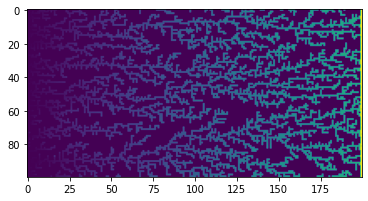

In [100]:
import matplotlib.pyplot as plt
matrix = dla(100, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

[[  0.   0.   0. ...   0.   0.   0.]
 [ 96.   0. 589. ...   0.   0.   0.]
 [  0.   0. 104. ...   0.   0.   0.]
 ...
 [ 97. 216. 603. ...   0.   0.   0.]
 [ 15.   0.   0. ...   0.   0.   0.]
 [  6.   0.   0. ...   0.   0.   0.]]


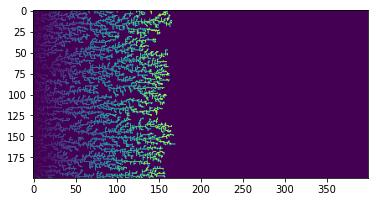

In [76]:
matrix = dla(200, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

[[221.   0. 447. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 22.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [334. 348. 424. ...   0.   0.   0.]]


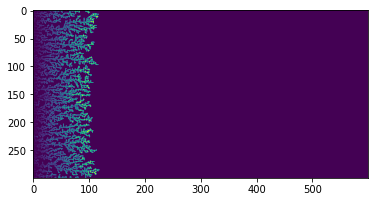

In [77]:
matrix = dla(300, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

QUESTION 4

Text(0, 0.5, 'T')

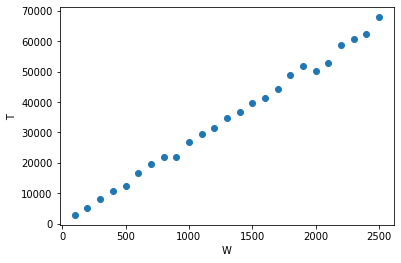

In [94]:
W_list = [i*100 for i in range(1, 26)]
t = []
H = 100

for W in W_list:

  a = 2
  matrix = np.zeros([a*W, W])
  max_height = 0
  t_num = 0
  while max_height < H:
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-1)% W, pos[1]), 
                                                    ((pos[0]+1)% W , pos[1]), 
                                                    (pos[0], pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/3):
          pos = ((pos[0]-1) % W, pos[1])
        elif prob < (2/3):
          pos = ((pos[0]+1) % W, pos[1])
        else:
          pos = (pos[0], pos[1]-1)
    matrix[pos[1]][pos[0]] = 1
    t_num += 1
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]

  t.append(t_num)

plt.scatter(W_list, t)
plt.xlabel('W')
plt.ylabel('T')

QUESTION 5

Text(0, 0.5, 'density')

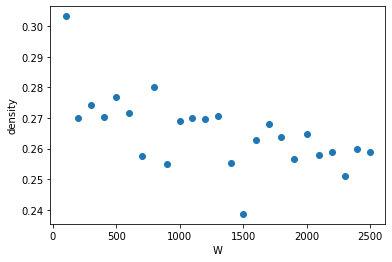

In [90]:
#varying W
density = []
for i, W in enumerate(W_list):
  density.append(t[i]/(H*W))
plt.scatter(W_list, density)
plt.xlabel('W')
plt.ylabel('density')

Text(0, 0.5, 'density')

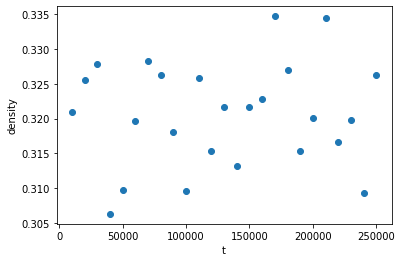

In [80]:
#varying t
t_list = [i*10000 for i in range(1, 26)]
H = 100
W = 100
a = 2
density = []

for t in t_list:
  matrix = np.zeros([a*W, W])
  max_height = 0
  for _ in range(t):
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-1)% W, pos[1]), 
                                                    ((pos[0]+1)% W , pos[1]), 
                                                    (pos[0], pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/3):
          pos = ((pos[0]-1) % W, pos[1])
        elif prob < (2/3):
          pos = ((pos[0]+1) % W, pos[1])
        else:
          pos = (pos[0], pos[1]-1)
    matrix[pos[1]][pos[0]] = 1
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]
  
  #how many particles are in W*H?
  t_portion = sum(np.sum(matrix, axis = 1)[:H])
  density.append(t_portion/(H*W))

plt.scatter(t_list, density)
plt.xlabel('t')
plt.ylabel('density')

QUESTION 6

In [81]:
def dla_tri(W, a, t):
  matrix = np.zeros([a*W, W])
  max_height = 0
  color = 1
  for _ in range(t):
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-2) % W, pos[1]), 
                                                    ((pos[0]+2) % W, pos[1]), 
                                                    ((pos[0]-1) % W, pos[1]-1),
                                                    ((pos[0]+1) % W, pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/4):
          pos = ((pos[0]-2) % W, pos[1])
        elif prob < (2/4):
          pos = ((pos[0]+2) % W, pos[1])
        elif prob < (3/4):
          pos = ((pos[0]-1) % W, pos[1]-1)
        else:
          pos = ((pos[0]+1) % W, pos[1]-1)
    matrix[pos[1]][pos[0]] = color
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]
    color += 1
  return matrix.T

[[   0.    0.    0. ...    0.    0. 9984.]
 [  43.    0.   95. ...    0.    0. 9851.]
 [   0.   73.    0. ...    0.    0. 9952.]
 ...
 [  12.   74.    0. ...    0.    0. 9959.]
 [   0.    0.    0. ... 5585.    0. 9971.]
 [   0.    0.    0. ...    0. 5604. 9749.]]


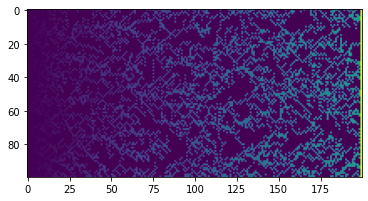

In [82]:
matrix = dla_tri(100, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

[[  0.   0.  61. ...   0.   0.   0.]
 [  3.  51.   0. ...   0.   0.   0.]
 [ 47. 114.   0. ...   0.   0.   0.]
 ...
 [ 89.  46.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


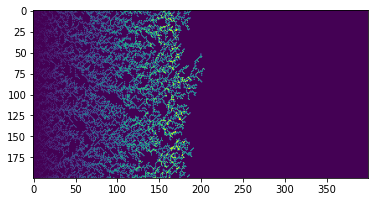

In [83]:
matrix = dla_tri(200, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

[[  0.   0.   0. ...   0.   0.   0.]
 [142. 152. 241. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 150.   0. ...   0.   0.   0.]
 [ 49. 123.   0. ...   0.   0.   0.]]


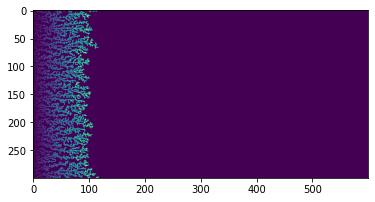

In [84]:
matrix = dla(300, 2, 10000)
print(matrix)
plt.imshow(matrix, cmap = 'viridis')

Text(0, 0.5, 'T')

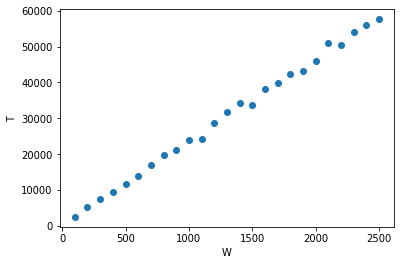

In [92]:
W_list = [i*100 for i in range(1, 26)]
t = []
H = 100

for W in W_list:

  a = 2
  matrix = np.zeros([a*W, W])
  max_height = 0
  t_num = 0
  while max_height < H:
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-2) % W, pos[1]), 
                                                    ((pos[0]+2) % W, pos[1]), 
                                                    ((pos[0]-1) % W, pos[1]-1),
                                                    ((pos[0]+1) % W, pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/4):
          pos = ((pos[0]-2) % W, pos[1])
        elif prob < (2/4):
          pos = ((pos[0]+2) % W, pos[1])
        elif prob < (3/4):
          pos = ((pos[0]-1) % W, pos[1]-1)
        else:
          pos = ((pos[0]+1) % W, pos[1]-1)
    matrix[pos[1]][pos[0]] = 1
    t_num += 1
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]

  t.append(t_num)

plt.scatter(W_list, t)
plt.xlabel('W')
plt.ylabel('T')

Text(0, 0.5, 'density')

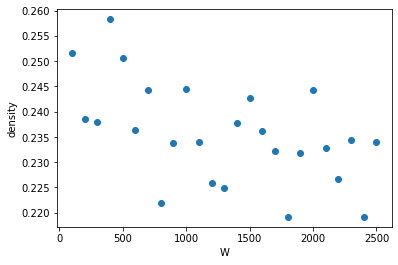

In [86]:
#varying W
density = []
for i, W in enumerate(W_list):
  density.append(t[i]/(H*W))
plt.scatter(W_list, density)
plt.xlabel('W')
plt.ylabel('density')

Text(0, 0.5, 'density')

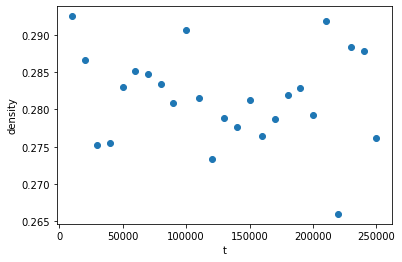

In [87]:
#varying t
t_list = [i*10000 for i in range(1, 26)]
H = 100
W = 100
a = 2
density = []

for t in t_list:
  matrix = np.zeros([a*W, W])
  max_height = 0
  for _ in range(t):
    pos = (rand.randint(0, W-1), min(max_height+1, a*W-1))
    #print(pos)
    while pos[1] > 0:
      neighbors = [matrix[y][x] == 0 for (x, y) in [((pos[0]-2) % W, pos[1]), 
                                                    ((pos[0]+2) % W, pos[1]), 
                                                    ((pos[0]-1) % W, pos[1]-1),
                                                    ((pos[0]+1) % W, pos[1]-1)]] 
      
      #all([True, True, True]) = True
      if not all(neighbors):
        break
      else: #move
        prob = rand.random()
        if prob < (1/4):
          pos = ((pos[0]-2) % W, pos[1])
        elif prob < (2/4):
          pos = ((pos[0]+2) % W, pos[1])
        elif prob < (3/4):
          pos = ((pos[0]-1) % W, pos[1]-1)
        else:
          pos = ((pos[0]+1) % W, pos[1]-1)
    matrix[pos[1]][pos[0]] = 1
    #update variables
    if pos[1] > max_height:
      max_height = pos[1]
  
  #how many particles are in W*H?
  t_portion = sum(np.sum(matrix, axis = 1)[:H])
  density.append(t_portion/(H*W))

plt.scatter(t_list, density)
plt.xlabel('t')
plt.ylabel('density')